In [99]:
from nltk.tokenize import word_tokenize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sortedcontainers import SortedSet
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [100]:
#open csv file and tokenize the text column into a new column
s = pd.read_csv('spam_ham_dataset.csv')
s['tokenized_text']= s['text'].apply(lambda x:word_tokenize(x))
print(s['tokenized_text'])


0       [Subject, :, enron, methanol, ;, meter, #, :, ...
1       [Subject, :, hpl, nom, for, january, 9, ,, 200...
2       [Subject, :, neon, retreat, ho, ho, ho, ,, we,...
3       [Subject, :, photoshop, ,, windows, ,, office,...
4       [Subject, :, re, :, indian, springs, this, dea...
                              ...                        
5166    [Subject, :, put, the, 10, on, the, ft, the, t...
5167    [Subject, :, 3, /, 4, /, 2000, and, following,...
5168    [Subject, :, calpine, daily, gas, nomination, ...
5169    [Subject, :, industrial, worksheets, for, augu...
5170    [Subject, :, important, online, banking, alert...
Name: tokenized_text, Length: 5171, dtype: object


<AxesSubplot:title={'center':'spam tokens frequency'}>

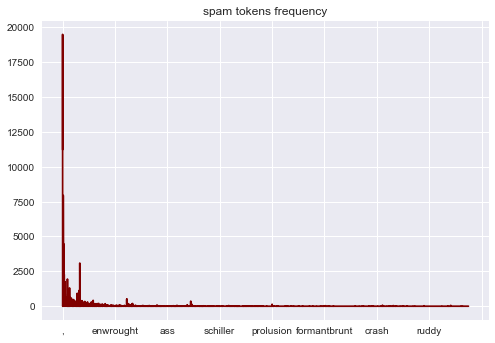

In [101]:
#EDA
#plot the spam frequency of each token
spam_tokens = s[s['label_num'] == 1]['tokenized_text'].apply(pd.value_counts).sum()
spam_tokens.plot(title="spam tokens frequency", color='maroon')

<AxesSubplot:title={'center':'ham tokens frequency'}>

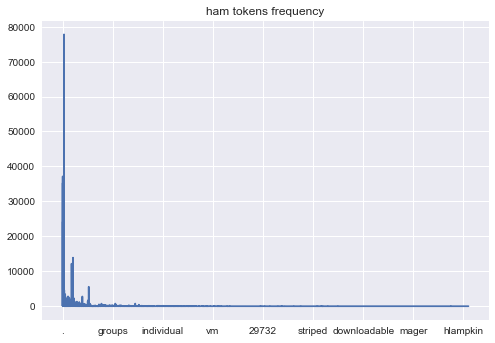

In [102]:
#plot the ham frequency of each token
ham_tokens = s[s['label_num'] == 0]['tokenized_text'].apply(pd.value_counts).sum()
ham_tokens.plot(title="ham tokens frequency")

In [103]:
print("spam")
print(spam_tokens.describe)

spam
<bound method NDFrame.describe of ,                  11227.0
.                  19489.0
Subject             1499.0
hashish                2.0
robed                  1.0
                    ...   
bladdernut             1.0
macintoshdogleg        1.0
ilaa                   1.0
liqaa                  1.0
charterr               1.0
Length: 38750, dtype: float64>


In [104]:
print("ham")
print(ham_tokens.describe)

ham
<bound method NDFrame.describe of .           35192.0
}              59.0
you          5365.0
daily         555.0
to          15172.0
             ...   
isnt            1.0
statute         1.0
perfer          1.0
liquide         2.0
buydeaug        1.0
Length: 20249, dtype: float64>


In [105]:
print(spam_tokens.mode())

0    1.0
dtype: float64


In [106]:
print(ham_tokens.mode())

0    1.0
dtype: float64


In [107]:
#Q4
tokenizer_re = r"[^a-zA-Z0-9]"

def tokenize(text: str) -> list():
    return re.sub(tokenizer_re, " ", text.lower()).split()

wordset = SortedSet()
for row in s['tokenized_text']:
    wordset.update(row)


In [108]:
# Q4
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vectorizer = CountVectorizer(ngram_range=(1,1), stop_words='english')
#transform
count_data = vectorizer.fit_transform(s.text.tolist())
 
#creating a dataframe of features 
X = pd.DataFrame(count_data.toarray(),columns=vectorizer.get_feature_names_out())
print(X)
             

      00  000  0000  000000  000000000002858  000000000049773  000080  000099  \
0      1    0     0       0                0                0       0       0   
1      0    0     0       0                0                0       0       0   
2      0    0     0       0                0                0       0       0   
3      0    0     0       0                0                0       0       0   
4      0    0     0       0                0                0       0       0   
...   ..  ...   ...     ...              ...              ...     ...     ...   
5166   0    0     0       0                0                0       0       0   
5167   0    4     0       0                0                0       0       0   
5168   0    0     0       0                0                0       0       0   
5169   0    0     0       0                0                0       0       0   
5170   0    0     0       0                0                0       0       0   

      0001  00018  ...  zyn

In [109]:
#define a target - y
#split the data to test and train
bow_benchmarks = []
y = s.label_num
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [110]:
#scikit-learn classification model - random forset
from sklearn.ensemble import RandomForestClassifier

RF_classifier = RandomForestClassifier(n_estimators=100, random_state=0)

In [111]:
# checking score - accuracy, precision, recall,f1
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
def benchmark(classifier):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    a_score = accuracy_score(y_test, y_pred)
    p_score = precision_score(y_test, y_pred)
    r_score = recall_score(y_test, y_pred)
    f_score = f1_score(y_test, y_pred)

    clf_descr = classifier.__class__.__name__
    stats = {'name': clf_descr,'accuracy:': a_score,'precision:':p_score,'recall:': r_score,'f1':f_score}
    stats = pd.DataFrame.from_dict(stats,orient='index')
    return stats

In [112]:
# calling the benchmark function with random forest classifier(bow) and print the score
bow_rf_results = benchmark(RF_classifier)
print(bow_rf_results)

                                 0
name        RandomForestClassifier
accuracy:                 0.981643
precision:                0.952862
recall:                   0.982639
f1                        0.967521


In [114]:
# Q7
#using logistic regression model(bow)
from sklearn.linear_model import LogisticRegression

LR_classifier = LogisticRegression(C=4, max_iter=800)
bow_LR_results = benchmark(LR_classifier)

In [115]:
# transform
tf_idf_vec = TfidfVectorizer(use_idf=True, smooth_idf=False, ngram_range=(1,1),stop_words='english')
tf_idf_data = tf_idf_vec.fit_transform(s.text.tolist())

#creating a dataframe of features
X=pd.DataFrame(tf_idf_data.toarray(),columns=tf_idf_vec.get_feature_names_out())

In [116]:
# split the date for tf-idf models
X_train, X_test,y_train,y_test = train_test_split( X, y, test_size=0.2, random_state=123)
#tf-idf-random forest
tf_idf_RF_results = benchmark(RF_classifier)

In [117]:
#tf-idf-logistic regression
tf_idf_LR_results = benchmark(LR_classifier)

In [118]:
# printing results
print(bow_rf_results)
print('------------------------------------')
print(bow_LR_results)
print('------------------------------------')
print(tf_idf_RF_results)
print('------------------------------------')
print(tf_idf_LR_results)

                                 0
name        RandomForestClassifier
accuracy:                 0.981643
precision:                0.952862
recall:                   0.982639
f1                        0.967521
------------------------------------
                             0
name        LogisticRegression
accuracy:             0.981643
precision:            0.959044
recall:               0.975694
f1                    0.967298
------------------------------------
                                 0
name        RandomForestClassifier
accuracy:                 0.980676
precision:                0.952703
recall:                   0.979167
f1                        0.965753
------------------------------------
                             0
name        LogisticRegression
accuracy:             0.989372
precision:            0.975945
recall:               0.986111
f1                    0.981002


In [119]:
print('The best model is the one using Logistic Regression Model and the "term frequency–inverse document frequency"')
print('We believe that the reason for the is that the data may be more suited to a linear model.')
print('another reason might be that the logistic regression model might be more sensitive to the weighting of the features,  which could be particularly beneficial when using the TF-IDF representation of the text data.')

The best model is the one using Logistic Regression Model and the "term frequency–inverse document frequency"
We believe that the reason for the is that the data may be more suited to a linear model.
another reason might be that the logistic regression model might be more sensitive to the weighting of the features,  which could be particularly beneficial when using the TF-IDF representation of the text data.
